In [0]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [123]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Movie+Assignment+Data.csv to Movie+Assignment+Data (1).csv


## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [124]:
movies = pd.read_csv(io.BytesIO(uploaded['Movie+Assignment+Data.csv']))
#movies = pd.read_csv("data/Movie+Assignment+Data.csv")
# Write your code for importing the csv file here
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [125]:
# Write your code for inspection here
print("Data frame column names = ", movies.columns)
print("\n Data frame shape = ", movies.shape)
print("\n Data frame variable types: \n", movies.dtypes)


Data frame column names =  Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

 Data frame shape =  (5043, 28)

 Data frame variable types: 
 color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        flo

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [126]:
# Write your code for column-wise null count here

#counting and printing null values by column, 
print('null values by column\n',movies.isnull().sum(), "\n")

#storing them in a dataframe because we later need to calculate % nulls per column
movie_columns = pd.DataFrame(movies.isnull().sum())


#renaming dataframe column for better interpretability
movie_columns.rename(columns = {0:'missing_values'}, inplace = True) 
print(movie_columns.head(),"\n")

#converting indexs (column names) into a dataframe columns
modified = movie_columns.reset_index()
print(modified.head(),"\n")

#renaming newly creating index column for better interpretability
modified.rename(columns = {'index':'col_names'}, inplace = True) 
print(modified.head(),"\n")

null values by column
 color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64 

                         missing_value

In [127]:
# Write your code for row-wise null count here
movies.apply(lambda x: x.count(), axis=1)

0       28
1       28
2       28
3       28
4       14
        ..
5038    24
5039    23
5040    24
5041    26
5042    28
Length: 5043, dtype: int64

In [128]:
# Write your code for column-wise null percentages here

modified['prcnt_missing_values'] = 0
modified['prcnt_missing_values'] = round(((modified['missing_values'] / 5043)*100),2)
modified

,col_names,missing_values,prcnt_missing_values
0,color,19,0.38
1,director_name,104,2.06
2,num_critic_for_reviews,50,0.99
3,duration,15,0.30
4,director_facebook_likes,104,2.06
5,actor_3_facebook_likes,23,0.46
6,actor_2_name,13,0.26
7,actor_1_facebook_likes,7,0.14
8,gross,884,17.53
9,genres,0,0.00


-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [129]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
print("Data frame columns before dropping = ", movies.columns)
movies = movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name'
,'cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'], axis=1)
print("\n \n Data frame columns after dropping = ", movies.columns)

Data frame columns before dropping =  Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

 
 Data frame columns after dropping =  Index(['director_name', 'num_critic_for_reviews', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [130]:
movie_columns = pd.DataFrame(movies.isnull().sum())


#renaming dataframe column for better interpretability
movie_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
modified = movie_columns.reset_index()

#renaming newly creating index column for better interpretability
modified.rename(columns = {'index':'col_names'}, inplace = True) 

print(movies.apply(lambda x: x.count(), axis=1))
modified['prcnt_missing_values'] = 0
modified['prcnt_missing_values'] = round(((modified['missing_values'] / 5043)*100),2)
#inspecting null values % across columns before cleaning data
modified

0       13
1       13
2       13
3       13
4        7
        ..
5038    11
5039     9
5040    12
5041    12
5042    13
Length: 5043, dtype: int64


,col_names,missing_values,prcnt_missing_values
0,director_name,104,2.06
1,num_critic_for_reviews,50,0.99
2,gross,884,17.53
3,genres,0,0.00
4,actor_1_name,7,0.14
5,movie_title,0,0.00
6,num_voted_users,0,0.00
7,num_user_for_reviews,21,0.42
8,language,12,0.24
9,budget,492,9.76


In [0]:
# Write your code for dropping the rows here
movies = movies[movies.gross.notnull()]
movies = movies[movies.budget.notnull()]

inspecting null value % after cleaning data

In [132]:
movie_columns = pd.DataFrame(movies.isnull().sum())


#renaming dataframe column for better interpretability
movie_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
modified = movie_columns.reset_index()

#renaming newly creating index column for better interpretability
modified.rename(columns = {'index':'col_names'}, inplace = True) 

print(movies.apply(lambda x: x.count(), axis=1))
modified['prcnt_missing_values'] = 0
modified['prcnt_missing_values'] = round(((modified['missing_values'] / 5043)*100),2)
modified

0       13
1       13
2       13
3       13
5       13
        ..
5033    13
5034    13
5035    13
5037    13
5042    13
Length: 3891, dtype: int64


,col_names,missing_values,prcnt_missing_values
0,director_name,0,0.00
1,num_critic_for_reviews,1,0.02
2,gross,0,0.00
3,genres,0,0.00
4,actor_1_name,3,0.06
5,movie_title,0,0.00
6,num_voted_users,0,0.00
7,num_user_for_reviews,0,0.00
8,language,3,0.06
9,budget,0,0.00


-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [133]:
# Write your code for filling the NaN values in the 'language' column here

movies.loc[(movies['language'].isnull() ),'language'] = 'English'
#Checking if NaN values in language section are removed
movies.isnull().sum() 

director_name             0
num_critic_for_reviews    1
gross                     0
genres                    0
actor_1_name              3
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [134]:
# Write your code for checking number of retained rows here
print('number of retained rows',len(movies.index))
initial_number_of_rows = 5043
print('\n\npercentage rows retained =',round((len(movies.index)/initial_number_of_rows),2))

number of retained rows 3891


percentage rows retained = 0.77


**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [135]:
#checking columns and values in them
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000


In [136]:
# Write your code for unit conversion here
movies['budget'] = movies['budget']/(10**6)
movies['gross'] = movies['gross']/(10**6)
#checking successful conversion
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [0]:
# Write your code for creating the profit column here
movies['profit'] = 0 #initialising
movies['profit'] = movies['gross'] - movies['budget']

In [138]:
# Write your code for sorting the dataframe here
movies = movies.sort_values(by=['profit'] , ascending=False)
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459


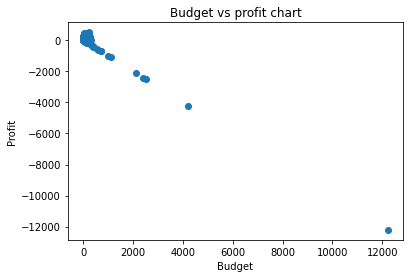

In [139]:
# Write code for profit vs budget plot here
import matplotlib.pyplot as plt
#plt.figure(figsize=(20, 5))
plt.scatter(movies['budget'],movies['profit'])
plt.title('Budget vs profit chart')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()

In [140]:
# Write your code to get the top 10 profiting movies here
top10 = movies.iloc[0:10]
top10.head(15)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [0]:
# Write your code for dropping duplicate values here
movies = movies.drop_duplicates(subset='movie_title', keep="first")

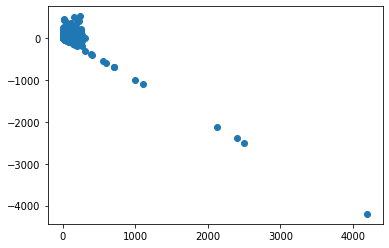

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


In [142]:
# Write code for repeating subtask 2 here
movies['profit'] = 0 #initialising
movies['profit'] = movies['gross'] - movies['budget']
movies = movies.sort_values(by=['profit'] , ascending=False)
plt.scatter(movies['budget'],movies['profit'])
plt.show()
top10 = movies.iloc[0:10]
top10.head(15)

**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [0]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
movies_top250 = movies.copy()
movies_top250 = movies_top250.loc[movies_top250['num_voted_users']>25000]
movies_top250 = movies_top250.sort_values(by=['imdb_score'] , ascending=False)
IMDb_Top_250 = movies_top250.iloc[0:250]

In [144]:
 # Write your code to extract top foreign language films from 'IMDb_Top_250' here
 Top_Foreign_Lang_Film = IMDb_Top_250.loc[IMDb_Top_250['language'] != 'English']
 Top_Foreign_Lang_Film

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.200000,1966.0,8.9,20000,4.900000
4747,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.000000,1954.0,8.7,11000,-1.730939
4029,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.300000,2002.0,8.7,28000,4.263397
2373,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.000000,2001.0,8.6,28000,-8.950114
4259,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.000000,2006.0,8.5,39000,9.284657
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.180000,1997.0,8.5,0,0.745402
1329,S.S. Rajamouli,44.0,6.498000,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410.0,Telugu,18.026148,2015.0,8.4,21000,-11.528148
4105,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.000000,2003.0,8.4,43000,-0.818710
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
2970,Wolfgang Petersen,96.0,11.433134,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426.0,German,14.000000,1981.0,8.4,11000,-2.566866


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [145]:
# Write your code for extracting the top 10 directors here
movie_t10_d = movies.copy()

movie_t10_d = movie_t10_d.pivot_table(index='director_name',values='imdb_score',aggfunc = 'mean')
movie_t10_d = pd.DataFrame(movie_t10_d.to_records())
movie_t10_d = movie_t10_d.fillna(0)
movie_t10_d = movie_t10_d.sort_values(by=['imdb_score','director_name'] , ascending=False)
top10director = movie_t10_d[0:10]
top10director

,director_name,imdb_score
1675,Tony Kaye,8.600000
216,Charles Chaplin,8.600000
1440,Ron Fricke,8.500000
1017,Majid Majidi,8.500000
302,Damien Chazelle,8.500000
45,Alfred Hitchcock,8.500000
1498,Sergio Leone,8.433333
260,Christopher Nolan,8.425000
1467,S.S. Rajamouli,8.400000
1371,Richard Marquand,8.400000


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [146]:
# Write your code for extracting the first two genres of each movie here
movie_genres = movies.copy()

movie_g = movie_genres['genres'].str.split('|', expand=True).rename(columns = lambda x: "string"+str(x+1))
movie_genres = pd.concat([movie_genres, movie_g], axis=1)
movie_genres = movie_genres.drop(['string3','string4','string5','string6','string7','string8'],axis=1)
movie_genres.rename(columns = {'string1':'genre_1'}, inplace = True)
movie_genres.rename(columns = {'string2':'genre_2'}, inplace = True)
movie_genres.loc[(movie_genres['genre_2'].isnull() ),'genre_2'] = movie_genres['genre_1']
movie_genres.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271,Action,Adventure
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302,Drama,Romance
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665,Action,Adventure
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459,Family,Sci-Fi


In [147]:
# Write your code for grouping the dataframe here

movies_by_segment = movie_genres.groupby(["genre_1","genre_2"])["gross"].mean()
movies_by_segment = pd.DataFrame(movies_by_segment.to_frame())
print("grouped by genres and gross income:\n", movies_by_segment.head())

grouped by genres and gross income:
                         gross
genre_1 genre_2              
Action  Action      59.520907
        Adventure  107.880651
        Animation   92.680515
        Biography   44.355422
        Comedy      52.678671


In [148]:
# Write your code for getting the 5 most popular combo of genres here

movie_genres['genre_combo'] = movie_genres[['genre_1', 'genre_2']].agg(' + '.join, axis=1)
PopGenre = movie_genres.pivot_table(index='genre_combo',values='gross',aggfunc = 'mean')
PopGenre = pd.DataFrame(PopGenre.to_records())
PopGenre = PopGenre.fillna(0)
PopGenre = PopGenre.sort_values(by=['gross'] , ascending=False)
PopGenre = PopGenre[0:5]
PopGenre

,genre_combo,gross
83,Family + Sci-Fi,434.949459
28,Adventure + Sci-Fi,228.627758
18,Adventure + Animation,115.949069
24,Adventure + Family,110.942298
1,Action + Adventure,107.880651


**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [149]:
# Write your code for creating three new dataframes here

 # Include all movies in which Meryl_Streep is the lead
favs = movies.copy() 
Meryl_Streep = favs.loc[favs['actor_1_name'] == 'Meryl Streep']
Meryl_Streep.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1408,David Frankel,208.0,124.732962,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.732962
1575,Sydney Pollack,66.0,87.100000,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.100000
1204,Nora Ephron,252.0,94.125426,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.125426
1618,David Frankel,234.0,63.536011,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.536011
410,Nancy Meyers,187.0,112.703470,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.703470


In [150]:
# Include all movies in which Leo_Caprio is the lead
Leo_Caprio = favs.loc[favs['actor_1_name'] == 'Leonardo DiCaprio']
Leo_Caprio.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
97,Christopher Nolan,642.0,292.568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,132.568851
911,Steven Spielberg,194.0,164.435221,Biography|Crime|Drama,Leonardo DiCaprio,Catch Me If You Can,525801,667.0,English,52.0,2002.0,8.0,15000,112.435221
296,Quentin Tarantino,765.0,162.804648,Drama|Western,Leonardo DiCaprio,Django Unchained,955174,1193.0,English,100.0,2012.0,8.5,199000,62.804648
179,Alejandro G. Iñárritu,556.0,183.635922,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,1188.0,English,135.0,2015.0,8.1,190000,48.635922


In [151]:
# Include all movies in which Brad_Pitt is the lead
Brad_Pitt = favs.loc[favs['actor_1_name'] == 'Brad Pitt']
Brad_Pitt.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
400,Steven Soderbergh,186.0,183.405771,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845.0,English,85.0,2001.0,7.8,0,98.405771
255,Doug Liman,233.0,186.336103,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798.0,English,120.0,2005.0,6.5,0,66.336103
940,Neil Jordan,120.0,105.264608,Drama|Fantasy|Horror,Brad Pitt,Interview with the Vampire: The Vampire Chroni...,239752,406.0,English,60.0,1994.0,7.6,11000,45.264608
470,David Ayer,406.0,85.707116,Action|Drama|War,Brad Pitt,Fury,303185,701.0,English,68.0,2014.0,7.6,82000,17.707116
254,Steven Soderbergh,198.0,125.531634,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627.0,English,110.0,2004.0,6.4,0,15.531634


In [152]:
# Write your code for combining the three dataframes here
Combined = Meryl_Streep.append(Leo_Caprio, ignore_index = True)

index = Combined.index
number_of_rows = len(index)
print(number_of_rows)


Combined = Combined.append(Brad_Pitt, ignore_index = True)

index = Combined.index
number_of_rows = len(index)
print(number_of_rows)

31
48


In [0]:
# Write your code for grouping the combined dataframe here
Combined_grouped = Combined.groupby(["actor_1_name"])
Combined_grouped = pd.DataFrame(Combined_grouped)

In [154]:
# Write the code for finding the mean of critic reviews and audience reviews here
mean_critic_reviews = Combined.pivot_table(index='actor_1_name',values='num_critic_for_reviews',aggfunc = 'mean')
mean_critic_reviews = pd.DataFrame(mean_critic_reviews.to_records())
mean_critic_reviews = mean_critic_reviews.sort_values(by=['num_critic_for_reviews'] , ascending=False)
print(mean_critic_reviews)

print('\n\n\n\n')

mean_audience_review = Combined.pivot_table(index='actor_1_name',values='num_user_for_reviews',aggfunc = 'mean')
mean_audience_review = pd.DataFrame(mean_audience_review.to_records())
mean_audience_review = mean_audience_review.sort_values(by=['num_user_for_reviews'] , ascending=False)
print(mean_audience_review)

        actor_1_name  num_critic_for_reviews
1  Leonardo DiCaprio              322.200000
0          Brad Pitt              245.000000
2       Meryl Streep              181.454545





        actor_1_name  num_user_for_reviews
1  Leonardo DiCaprio            922.550000
0          Brad Pitt            742.352941
2       Meryl Streep            297.181818


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [157]:
# Write the code for calculating decade here
movies['decade'] = round((movies['title_year']/10),0)*10
movies['decade'].head()

0       2010.0
29      2020.0
26      2000.0
3024    1980.0
3080    1980.0
Name: decade, dtype: float64

In [158]:
# Write your code for creating the data frame df_by_decade here 

df_by_decade = movies.pivot_table(index='decade',values='num_voted_users',aggfunc = 'sum')
df_by_decade = pd.DataFrame(df_by_decade.to_records())
df_by_decade = df_by_decade.sort_values(by=['decade'] , ascending=True)
df_by_decade

,decade,num_voted_users
0,1920.0,5
1,1930.0,124308
2,1940.0,958599
3,1950.0,422853
4,1960.0,2060212
5,1970.0,4414558
6,1980.0,15421431
7,1990.0,31870204
8,2000.0,139618684
9,2010.0,174553808


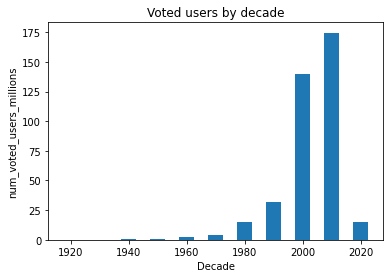

In [159]:
# Write your code for plotting number of voted users vs decade
df_by_decade['num_voted_users_millions'] = (df_by_decade['num_voted_users']/(10**6))
plt.bar(df_by_decade['decade'],df_by_decade['num_voted_users_millions'], width=5)
plt.title('Voted users by decade')
plt.xlabel('Decade')
plt.ylabel('num_voted_users_millions')
plt.show()